In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import factorial, log
from tqdm import tqdm

In [4]:
# N = 100_000
# K = 25_000
# n = 10_000

N = 10_000
K = 5000
n = 100

k_values = np.arange(max(0, n + K - N), min(n, K) + 1)

# Hypergeometric

Due to floating point overflow we shall use logs

$$
\log ( \mathbb{P}(k \text{ sample}|K \text{actual}) )
= \log {K \choose k} + \log{{N-K \choose n-k}} - log{N \choose n}
$$

In [5]:
def log_comb(n, r):
    return log(factorial(n)) - log(factorial(r)) - log(factorial(n - r))


def log_hyper_geometric(k, n, K, N):
    assert k <= min(n, K), "k is at most min(n,K)"
    assert k >= max(0, n + K - N), "k is at least max(0, n+K-N)"
    return log_comb(K, k) + log_comb(N - K, n - k) - log_comb(N, n)

In [6]:
log_hyper_geometric_distribution = [
    log_hyper_geometric(k=k, n=n, K=K, N=N) for k in tqdm(k_values)
]

hyper_geometric_distribution = np.exp(np.array(log_hyper_geometric_distribution))

100%|██████████| 101/101 [00:00<00:00, 153.20it/s]


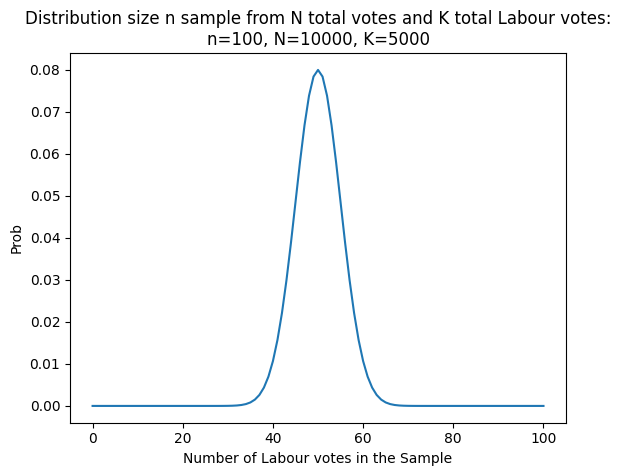

In [7]:
fig, ax = plt.subplots()  # Create a figure containing a single Axes.


ax.plot(k_values, hyper_geometric_distribution)  # Plot some data on the Axes.
ax.set_title(
    f"Distribution size n sample from N total votes and K total Labour votes:\nn={n}, N={N}, K={K}"
)
ax.set_xlabel("Number of Labour votes in the Sample")
ax.set_ylabel("Prob")

plt.show()  # Show the figure.

# Distribution of Actual Ballots!

In [6]:
# for now lets try a uniform prior
labour_prior = np.array(1 / (N + 1)).repeat(N + 1)
log_labour_prior = np.log(labour_prior)

In [7]:
def actual_ballot_distribution(k, n, K, N):
    unormalised_result = np.exp(
        [
            log_hyper_geometric(k=k, n=n, K=r, N=N) + log_labour_prior[r]
            for r in range(N + 1)
        ]
    )

    return unormalised_result[K] / unormalised_result.sum()

In [9]:
tmp_k = 0

# for r in tqdm(range(N + 1)):
#     if tmp_k > min(n, r):
#         log_unormalised_result = 0
#     if tmp_k < max(0, n + r - N):
#         log_unormalised_result = 0
#     else:
#         log_unormalised_result = (
#             log_hyper_geometric(k=tmp_k, n=n, K=r, N=N) + log_labour_prior[r]
#         )

In [10]:
import multiprocessing as mp
from tqdm import tqdm

In [11]:
# Assuming these variables are defined somewhere in your code:
# tmp_k, n, N, log_hyper_geometric, log_labour_prior

def compute_log_unormalised(r):
    if tmp_k > min(n, r):
        return 0
    if tmp_k < max(0, n + r - N):
        return 0
    else:
        return log_hyper_geometric(k=tmp_k, n=n, K=r, N=N) + log_labour_prior[r]

In [12]:
num_processes = mp.cpu_count()

In [14]:
# Number of processes to use, can be set to mp.cpu_count() for max parallelism
num_processes = mp.cpu_count()

# Create a pool of worker processes
with mp.Pool(processes=num_processes) as pool:
    # Parallel map function, tqdm is used for the progress bar
    results = list(tqdm(pool.imap(compute_log_unormalised, range(N + 1)), total=N + 1))

# Results now contain the output of the function for each value of r

  0%|          | 0/10001 [00:00<?, ?it/s]

In [66]:
import multiprocessing
def printVal(value):
    return ("hello "*(value))
pool_obj = multiprocessing.Pool()
ans = pool_obj.map(printVal,range(0,4))
print(ans)
pool_obj.close()


In [65]:
log_unormalised_result

0

In [53]:
log_hyper_geometric(k=0, n=100, K=9_901, N=10_000)

AssertionError: k is at least max(0, n+K-N)

In [31]:
log_comb(r, 0)

0.0

In [32]:
log_comb(N - r, n - 0)

ValueError: factorial() not defined for negative values

In [30]:
log_comb(r, 0) + log_comb(N - r, n - 0) - log_comb(N, n)

ValueError: factorial() not defined for negative values